In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
!pip install -U keras-tuner
import sys
import logging
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import torch
import seaborn as sns
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers, losses, optimizers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers import GaussianNoise
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score 
# confusion_matrix, precision_recall_curve, accuracy_score, precision_score


# Save log
so = open("AE_data.log", 'w', 10)
sys.stdout.echo = so
sys.stderr.echo = so
get_ipython().log.handlers[0].stream = so
get_ipython().log.setLevel(logging.INFO)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


<ipython-input-1-d281285c50dd>:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [2]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [4]:
df = pd.read_csv("all_group_train_normalized.csv")

In [5]:
df

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_1452,tcp_segment_data_byte_1453,tcp_segment_data_byte_1454,tcp_segment_data_byte_1455,tcp_segment_data_byte_1456,tcp_segment_data_byte_1457,tcp_segment_data_byte_1458,tcp_segment_data_byte_1459,Label,Label_binary
0,0.000000,0.156863,0.141176,0.219608,0.25098,0.0,0.501961,0.980392,0.266667,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
1,0.000000,0.156863,0.411765,0.819608,0.25098,0.0,0.501961,0.670588,0.149020,0.435294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,0.000000,0.156863,0.192157,0.996078,0.25098,0.0,0.501961,0.925490,0.494118,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,0.007843,0.686275,0.219608,0.941176,0.25098,0.0,0.501961,0.505882,0.690196,0.196078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infiltration,Malicious
4,0.000000,0.156863,0.305882,0.768627,0.25098,0.0,0.501961,0.811765,0.721569,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106859,0.000000,0.156863,0.235294,0.235294,0.25098,0.0,0.501961,0.886275,0.250980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
106860,0.000000,0.156863,0.227451,0.521569,0.25098,0.0,0.501961,0.890196,0.964706,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
106861,0.000000,0.643137,0.690196,0.113725,0.25098,0.0,0.243137,0.082353,0.294118,0.098039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brute Force,Malicious
106862,0.000000,0.203922,0.447059,0.176471,0.25098,0.0,0.250980,0.286275,0.501961,0.631373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [6]:
normal_data, attack_data = df[df['Label_binary']=='Benign'], df[df['Label_binary']=='Malicious']

In [7]:
normal_data.shape

(53432, 1527)

In [8]:
normal_data_200 = normal_data.iloc[:,0:200]

In [9]:
normal_data_200

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
0,0.0,0.156863,0.141176,0.219608,0.25098,0.0,0.501961,0.980392,0.266667,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.156863,0.411765,0.819608,0.25098,0.0,0.501961,0.670588,0.149020,0.435294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.156863,0.192157,0.996078,0.25098,0.0,0.501961,0.925490,0.494118,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.156863,0.305882,0.768627,0.25098,0.0,0.501961,0.811765,0.721569,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.203922,0.215686,0.725490,0.25098,0.0,0.501961,0.901961,0.713725,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106857,0.0,0.156863,0.098039,0.776471,0.25098,0.0,0.501961,0.015686,0.717647,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106859,0.0,0.156863,0.235294,0.235294,0.25098,0.0,0.501961,0.886275,0.250980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106860,0.0,0.156863,0.227451,0.521569,0.25098,0.0,0.501961,0.890196,0.964706,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106862,0.0,0.203922,0.447059,0.176471,0.25098,0.0,0.250980,0.286275,0.501961,0.631373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
attack_data_200 = attack_data.iloc[:,0:200]
attack_data_200

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
3,0.007843,0.686275,0.219608,0.941176,0.25098,0.0,0.501961,0.505882,0.690196,0.196078,...,0.152941,0.431373,0.427451,0.380392,0.439216,0.152941,0.12549,0.411765,0.45098,0.12549
5,0.000000,0.172549,0.243137,0.839216,0.00000,0.0,0.152941,0.870588,0.039216,0.490196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
9,0.000000,0.156863,0.482353,0.580392,0.25098,0.0,0.494118,0.039216,0.313725,0.952941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
10,0.000000,0.235294,0.113725,0.478431,0.25098,0.0,0.243137,0.658824,0.337255,0.392157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
11,0.000000,0.643137,0.992157,0.388235,0.25098,0.0,0.243137,0.784314,0.015686,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106852,0.000000,0.643137,0.968627,0.831373,0.25098,0.0,0.243137,0.803922,0.576471,0.082353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
106853,0.000000,0.156863,0.454902,0.960784,0.25098,0.0,0.494118,0.062745,0.937255,0.043137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
106855,0.000000,0.172549,0.470588,0.956863,0.00000,0.0,0.196078,0.596078,0.925490,0.470588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
106858,0.000000,0.270588,0.152941,0.474510,0.25098,0.0,0.501961,0.584314,0.568627,0.929412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000


In [11]:
X_train = normal_data_200.iloc[0:50000,:]
X_train

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
0,0.0,0.156863,0.141176,0.219608,0.25098,0.0,0.501961,0.980392,0.266667,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.156863,0.411765,0.819608,0.25098,0.0,0.501961,0.670588,0.149020,0.435294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.156863,0.192157,0.996078,0.25098,0.0,0.501961,0.925490,0.494118,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.156863,0.305882,0.768627,0.25098,0.0,0.501961,0.811765,0.721569,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.203922,0.215686,0.725490,0.25098,0.0,0.501961,0.901961,0.713725,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100025,0.0,0.156863,0.466667,0.772549,0.25098,0.0,0.501961,0.650980,0.717647,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100031,0.0,0.156863,0.482353,0.803922,0.25098,0.0,0.501961,0.635294,0.686275,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100032,0.0,0.156863,0.180392,0.133333,0.25098,0.0,0.501961,0.941176,0.352941,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100034,0.0,0.156863,0.113725,0.027451,0.25098,0.0,0.501961,0.003922,0.462745,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_test = normal_data_200.iloc[50000:,:]
X_test

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
100036,0.0,0.156863,0.372549,0.352941,0.25098,0.0,0.501961,0.749020,0.133333,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100037,0.0,0.156863,0.388235,0.670588,0.25098,0.0,0.501961,0.729412,0.819608,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100041,0.0,0.156863,0.050980,0.501961,0.25098,0.0,0.501961,0.062745,0.992157,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100045,0.0,0.156863,0.152941,0.784314,0.25098,0.0,0.501961,0.964706,0.705882,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100049,0.0,0.156863,0.490196,0.011765,0.25098,0.0,0.501961,0.082353,0.211765,0.737255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106857,0.0,0.156863,0.098039,0.776471,0.25098,0.0,0.501961,0.015686,0.717647,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106859,0.0,0.156863,0.235294,0.235294,0.25098,0.0,0.501961,0.886275,0.250980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106860,0.0,0.156863,0.227451,0.521569,0.25098,0.0,0.501961,0.890196,0.964706,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106862,0.0,0.203922,0.447059,0.176471,0.25098,0.0,0.250980,0.286275,0.501961,0.631373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters


# Define the model-building function for the tuner
def build_model(hp):
    input_dims = 200
    model_input = keras.Input(shape=(input_dims,))
    encoded = layers.Dense(units=hp.Int('encoding_units', min_value=16, max_value=64, step=16),
                           activation=hp.Choice('encoding_activation', values=['relu', 'tanh']))(model_input)

    for i in range(hp.Int('num_layers', 2, 6)):
        encoded = layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=64, step=16),
                               activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh']))(encoded)
    decoded = layers.Dense(units=input_dims, activation='sigmoid')(encoded)
    model = keras.Model(inputs=model_input, outputs=decoded)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mae')
    return model


# Instantiate the Hyperband tuner
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='hyperband',
    project_name='SAE_hyperband_51')

# Perform the hyperparameter search
tuner.search(X_train, X_train, validation_split=0.2, epochs=20, batch_size=16)

# Print the best hyperparameters found
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")


Trial 30 Complete [00h 03m 24s]
val_loss: 0.0062276097014546394

Best val_loss So Far: 0.0062276097014546394
Total elapsed time: 00h 33m 37s
Best hyperparameters: {'encoding_units': 32, 'encoding_activation': 'tanh', 'num_layers': 6, 'units_0': 48, 'activation_0': 'relu', 'units_1': 16, 'activation_1': 'tanh', 'learning_rate': 0.0006817113246107111, 'units_2': 64, 'activation_2': 'relu', 'units_3': 32, 'activation_3': 'relu', 'units_4': 48, 'activation_4': 'tanh', 'units_5': 48, 'activation_5': 'relu', 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [17]:
# Build the model with the best hyperparameters and train it on the full training set
model_SAE_Tuner = tuner.hypermodel.build(best_hps)
model_SAE_Tuner.fit(X_train, X_train, epochs=100, batch_size=128)

Epoch 1/100
391/391 [==============================] - 3s 4ms/step - loss: 0.0665
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0209
Epoch 3/100
391/391 [==============================] - 2s 6ms/step - loss: 0.0208
Epoch 4/100
391/391 [==============================] - 2s 6ms/step - loss: 0.0208
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0208
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0207
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0203
Epoch 8/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0195
Epoch 9/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0193
Epoch 10/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0191
Epoch 11/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0188
Epoch 12/100
391/391 [==============================] - 2s 6ms/step - loss: 0.0178
Epoch 13/100


In [18]:
infiltration_attack = df[df['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
portscan_attack = df[df['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(portscan_attack.shape)
ddos_attack = df[df['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df[df['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df[df['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df[df['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

(8905, 200)
(8905, 200)
(8905, 200)
(8905, 200)
(8906, 200)
(8906, 200)


108/108 [==============================] - 0s 2ms/step


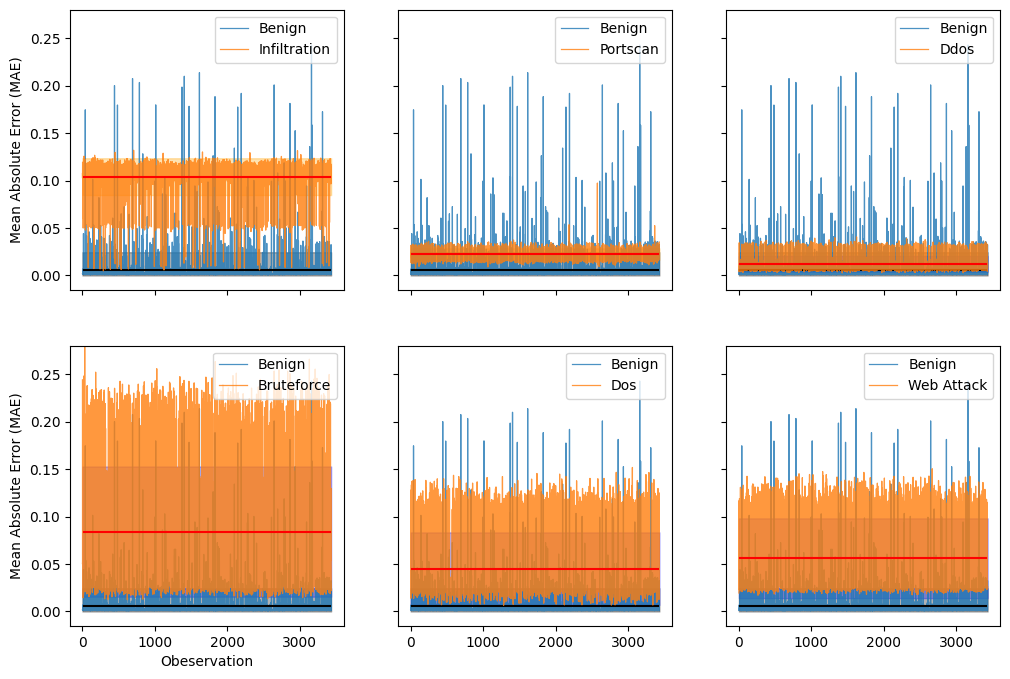

In [19]:

AE_normal_mae = tf.losses.mae(X_test, model_SAE_Tuner.predict(X_test))
AE_infiltration_attack_mae = tf.losses.mae(infiltration_attack.iloc[0:3432,:], model_SAE_Tuner.predict(infiltration_attack.iloc[0:3432,:]))
AE_portscan_attack_mae = tf.losses.mae(portscan_attack.iloc[0:3432,:], model_SAE_Tuner.predict(portscan_attack.iloc[0:3432,:]))
AE_ddos_attack_mae = tf.losses.mae(ddos_attack.iloc[0:3432,:], model_SAE_Tuner.predict(ddos_attack.iloc[0:3432,:]))
AE_bruteforce_attack_mae = tf.losses.mae(bruteforce_attack.iloc[0:3432,:], model_SAE_Tuner.predict(bruteforce_attack.iloc[0:3432,:]))
AE_dos_attack_mae = tf.losses.mae(dos_attack.iloc[0:3432,:], model_SAE_Tuner.predict(dos_attack.iloc[0:3432,:]))
AE_web_attack_mae = tf.losses.mae(web_attack.iloc[0:3432,:], model_SAE_Tuner.predict(web_attack.iloc[0:3432,:]))


plt.rcParams["figure.figsize"] = (12,8)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)


ax1.plot(AE_normal_mae,linewidth=0.9,alpha = 0.8,label = "Benign")
ax1.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
ax1.axhline(y = np.array(AE_normal_mae).mean(), color = 'black', linestyle = '-',xmin = 0.05, xmax = 0.95)


ax1.plot(AE_infiltration_attack_mae,linewidth=0.9,alpha = 0.8,label = "Infiltration")
ax1.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
ax1.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

ax1.set_ylabel("Mean Absolute Error (MAE)")
ax1.set_ylim(-0.015,0.28)
ax1.legend(loc=1)


ax2.plot(AE_normal_mae,linewidth=0.9,alpha = 0.8,label = "Benign")
ax2.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
ax2.axhline(y = np.array(AE_normal_mae).mean(), color = 'black', linestyle = '-',xmin = 0.05, xmax = 0.95)

ax2.plot(AE_portscan_attack_mae,linewidth=0.9,alpha = 0.8,label = "Portscan")
ax2.fill_between([i for i in range(3432)],np.array(AE_portscan_attack_mae).mean() - np.array(AE_portscan_attack_mae).std(),\
                 np.array(AE_portscan_attack_mae).mean() + np.array(AE_portscan_attack_mae).std(),color = "orange",alpha = 0.3)
ax2.axhline(y = np.array(AE_portscan_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

ax2.set_ylim(-0.015,0.28)
ax2.legend(loc=1)


ax3.plot(AE_normal_mae,linewidth=0.9,alpha = 0.8,label = "Benign")
ax3.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
ax3.axhline(y = np.array(AE_normal_mae).mean(), color = 'black', linestyle = '-',xmin = 0.05, xmax = 0.95)


ax3.plot(AE_ddos_attack_mae,linewidth=0.9,alpha = 0.8,label = "Ddos")
ax3.fill_between([i for i in range(3432)],np.array(AE_ddos_attack_mae).mean() - np.array(AE_ddos_attack_mae).std(),\
                 np.array(AE_ddos_attack_mae).mean() + np.array(AE_ddos_attack_mae).std(),color = "blue",alpha = 0.3)
ax3.axhline(y = np.array(AE_ddos_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)
ax3.set_ylim(-0.015,0.28)
ax3.legend(loc=1)


# ax4.set_title("(d)")

ax4.plot(AE_normal_mae,linewidth=0.9,alpha = 0.8,label = "Benign")
ax4.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
ax4.axhline(y = np.array(AE_normal_mae).mean(), color = 'black', linestyle = '-',xmin = 0.05, xmax = 0.95)

ax4.plot(AE_bruteforce_attack_mae,linewidth=0.9,alpha = 0.8,label = "Bruteforce")
ax4.fill_between([i for i in range(3432)],np.array(AE_bruteforce_attack_mae).mean() - np.array(AE_bruteforce_attack_mae).std(),\
                 np.array(AE_bruteforce_attack_mae).mean() + np.array(AE_bruteforce_attack_mae).std(),color = "blue",alpha = 0.3)
ax4.axhline(y = np.array(AE_bruteforce_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)
ax4.set_xlabel("Obeservation")
ax4.legend(loc=1)
ax4.set_ylim(-0.015,0.28)
ax4.set_ylabel("Mean Absolute Error (MAE)")

# ax5.set_title("(e)")

ax5.plot(AE_normal_mae,linewidth=0.9,alpha = 0.8,label = "Benign")
ax5.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
ax5.axhline(y = np.array(AE_normal_mae).mean(), color = 'black', linestyle = '-',xmin = 0.05, xmax = 0.95)

ax5.plot(AE_dos_attack_mae,linewidth=0.9,alpha = 0.8,label = "Dos")
ax5.fill_between([i for i in range(3432)],np.array(AE_dos_attack_mae).mean() - np.array(AE_dos_attack_mae).std(),\
                 np.array(AE_dos_attack_mae).mean() + np.array(AE_dos_attack_mae).std(),color = "blue",alpha = 0.3)
ax5.axhline(y = np.array(AE_dos_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)
ax5.set_ylim(-0.015,0.28)
ax5.legend(loc=1)

# ax6.set_title("(f)")
ax6.plot(AE_normal_mae,linewidth=0.9,alpha = 0.8,label = "Benign")
ax6.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
ax6.axhline(y = np.array(AE_normal_mae).mean(), color = 'black', linestyle = '-',xmin = 0.05, xmax = 0.95)

ax6.plot(AE_web_attack_mae,linewidth=0.9,alpha = 0.8,label = "Web Attack")
ax6.fill_between([i for i in range(3432)],np.array(AE_web_attack_mae).mean() - np.array(AE_web_attack_mae).std(),\
                 np.array(AE_web_attack_mae).mean() + np.array(AE_web_attack_mae).std(),color = "blue",alpha = 0.3)
ax6.axhline(y = np.array(AE_web_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)
ax6.set_ylim(-0.015,0.28)
ax6.legend(loc=1)


for ax in fig.get_axes():
    ax.label_outer()
    
# plt.savefig('fig.png', dpi=600,bbox_inches="tight")
#plt.savefig("Output/fig_AE.pdf")
